In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
N = 1e5      # Total number of computer hosts in the network topology
T = 200      # Simuation time / Day

### SI-Model

In [24]:
s = np.zeros([T])     # susceptiable
i = np.zeros([T])     # infective
beta = 0.2            # contact rate
alpha = 0             # growth rate
i[0] = 1              # initialize infective
s[0] = N - i[0]       # initialize susceptiable

for t in range(T-1):
    s[t + 1] = s[t] + alpha * N - beta * s[t] * i[t] / N
    i[t + 1] = i[t] + beta * s[t] * i[t] / N

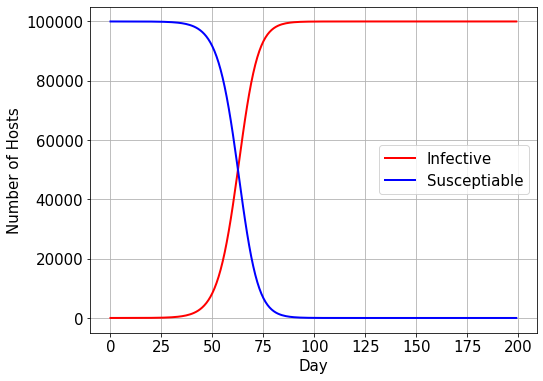

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(i, c='r', lw=2, label='Infective')
ax.plot(s, c='b', lw=2, label='Susceptiable')
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Hosts', fontsize=15)
ax.grid(1)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### SIS-Model

In [46]:
s = np.zeros([T])     # susceptiable
i = np.zeros([T])     # infective
beta = 0.5            # contact rate
alpha = 0             # growth rate
gamma = 0.1           # recovery rate
i[0] = 1              # initialize infective
s[0] = N - i[0]       # initialize susceptiable

for t in range(T-1):
    s[t + 1] = s[t] + alpha * N - beta * s[t] * i[t] / N + gamma * i[t]
    i[t + 1] = i[t] + beta * s[t] * i[t] / N - gamma * i[t]

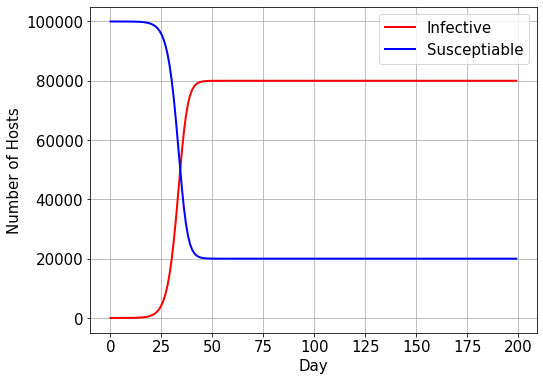

In [47]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(i, c='r', lw=2, label='Infective')
ax.plot(s, c='b', lw=2, label='Susceptiable')
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Hosts', fontsize=15)
ax.grid(1)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### SIR-Model

In [52]:
s = np.zeros([T])     # susceptiable
i = np.zeros([T])     # infective
r = np.zeros([T])     # recovered
beta = 0.3            # contact rate
alpha = 0             # growth rate
gamma = 0.1           # recovery rate
i[0] = 1              # initialize infective
s[0] = N - i[0]       # initialize susceptiable
r[0] = 0              # initialize recovered

for t in range(T-1):
    s[t + 1] = s[t] + alpha * N - beta * s[t] * i[t] / N
    i[t + 1] = i[t] + beta * s[t] * i[t] / N - gamma * i[t]
    r[t + 1] = r[t] + gamma * i[t]

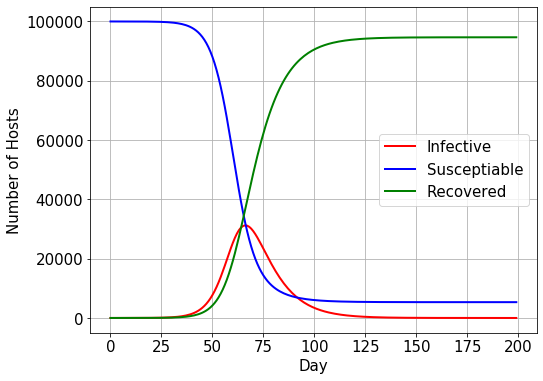

In [53]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(i, c='r', lw=2, label='Infective')
ax.plot(s, c='b', lw=2, label='Susceptiable')
ax.plot(r, c='g', lw=2, label='Recovered')
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Hosts', fontsize=15)
ax.grid(1)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### SEIR-Model

In [61]:
s = np.zeros([T])     # susceptiable
i = np.zeros([T])     # infective
r = np.zeros([T])     # recovered
e = np.zeros([T])     # exposed
beta = 0.35           # contact rate
alpha = 0             # growth rate
gamma = 0.1           # recovery rate
delta = 0.2           # trigger rate
i[0] = 1              # initialize infective
s[0] = N - i[0]       # initialize susceptiable
r[0] = 0              # initialize recovered
e[0] = 0              # initialize exposed

for t in range(T-1):
    s[t + 1] = s[t] + alpha * N - beta * s[t] * i[t] / N
    e[t + 1] = e[t] + beta * s[t] * i[t] / N - delta * e[t]
    i[t + 1] = i[t] + delta * e[t] - gamma * i[t]
    r[t + 1] = r[t] + gamma * i[t]

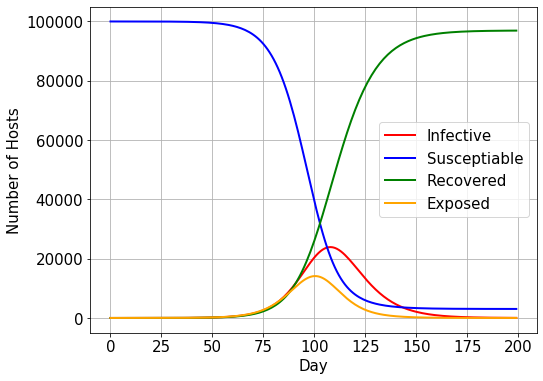

In [62]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(i, c='r', lw=2, label='Infective')
ax.plot(s, c='b', lw=2, label='Susceptiable')
ax.plot(r, c='g', lw=2, label='Recovered')
ax.plot(e, c='orange', lw=2, label='Exposed')
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Hosts', fontsize=15)
ax.grid(1)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### SEIR-IMPROVED-Model

In [101]:
s = np.zeros([T])     # susceptiable
i = np.zeros([T])     # infective
r = np.zeros([T])     # recovered
e = np.zeros([T])     # exposed
beta = 0.40           # contact rate
alpha = 0.001         # growth rate
gamma = 0.1           # recovery rate
delta = 0.2           # trigger rate
p = 0.2               # initially resisted rate
mu = 0.001            # scrap rate
k = 0.003             # Implementation rate of protective measures on S
l = 0.005             # Implementation rate of protective measures on E
eta = 0.5             # Ratio of I to S
omega = 0.5           # Ratio of E to S

i[0] = 1              # initialize infective
s[0] = N - i[0]       # initialize susceptiable
r[0] = 0              # initialize recovered
e[0] = 0              # initialize exposed

for t in range(T-1):
    s[t + 1] = s[t] + (1 - p) * alpha * N - beta * s[t] * (i[t] + e[t]) / N - mu * s[t] - k * s[t] 
    s[t + 1] += eta * gamma * i[t] + omega * l * e[t]
    e[t + 1] = e[t] + beta * s[t] * (i[t] + e[t]) / N - delta * e[t] - mu * e[t] - l * e[t]
    i[t + 1] = i[t] + delta * e[t] - gamma * i[t] - mu * i[t]
    r[t + 1] = r[t] + (1 - eta) * gamma * i[t] + alpha * p * N - mu * r[t] + k * s[t] + (1 - omega) * l * e[t]

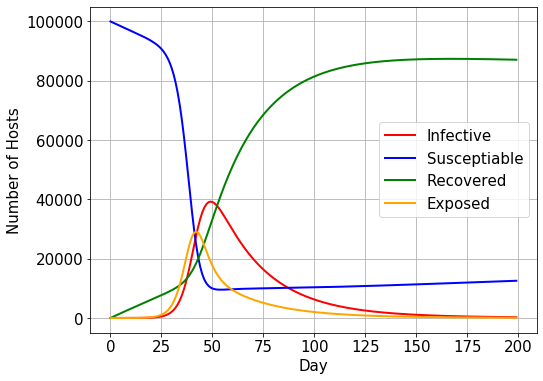

In [102]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(i, c='r', lw=2, label='Infective')
ax.plot(s, c='b', lw=2, label='Susceptiable')
ax.plot(r, c='g', lw=2, label='Recovered')
ax.plot(e, c='orange', lw=2, label='Exposed')
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Hosts', fontsize=15)
ax.grid(1)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);